#**MILEAGE PREDICTION - REGRESSION ANALYSIS**

Source:

This dataset was taken from the StatLib library which is maintained at Camegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the 'mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model_year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

#**-> Objective**

Here's the objective of mileage prediction using regression analysis:

Objective:

Predict the mileage of a vehicle based on various factors such as:

Independent Variables:

1. Engine Size (cc)
2. Number of Cylinders
3. Transmission Type (Automatic/Manual)
4. Fuel Type (Gasoline/Diesel)
5. Vehicle Weight (kg)
6. Horsepower (hp)
7. Drive Type (RWD/FWD/AWD)

Dependent Variable:

1. Mileage (km/l or miles/gallon)

Regression Analysis Goals:

1. Identify significant predictors of mileage.
2. Develop a model to accurately predict mileage.
3. Quantify the relationship between independent variables and mileage.
4. Determine the optimal combination of factors for maximum fuel efficiency.

Regression Metrics:

1. Coefficient of Determination (R-squared)
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)
4. Root Mean Squared Error (RMSE)


#**-> Data Source**

https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.cs

#**-> Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

#**-> Import Data**

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


#**-> Data Preprocessing**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#**-> Describe Data**

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#**Removing Missing Values**

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [61]:
# Calculate correlation only for numeric columns.
df.select_dtypes(include=np.number).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#**-> Data Visualization**

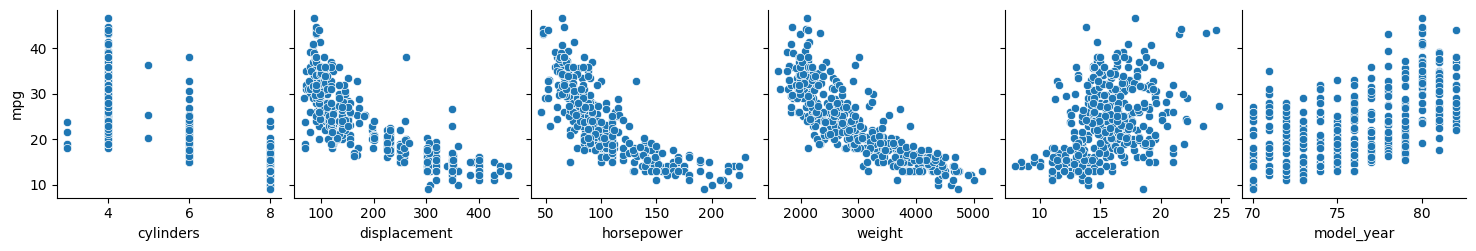

In [23]:
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'],  y_vars='mpg')


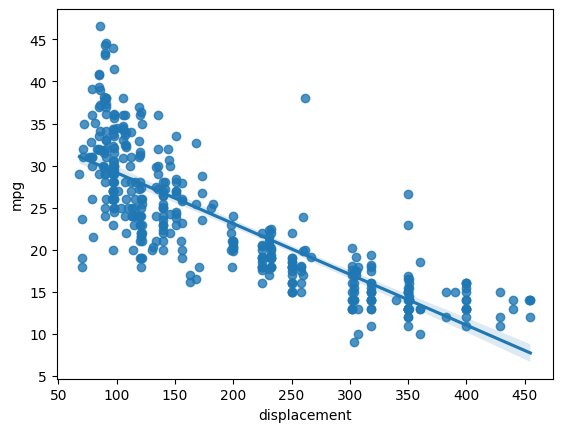

In [24]:
sns.regplot(x='displacement', y='mpg', data=df);

#**-> Define Target Variable y and Feature X**

In [25]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [27]:
y = df['mpg']

In [28]:
y.shape

(398,)

In [29]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

In [30]:
X.shape

(398, 6)

In [31]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


#**Scaling Data**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
X = ss.fit_transform(X)

In [35]:
X

array([[ 1.49819126,  1.0906037 ,  0.66413273,  0.63086987, -1.29549834,
        -1.62742629],
       [ 1.49819126,  1.5035143 ,  1.57459447,  0.85433297, -1.47703779,
        -1.62742629],
       [ 1.49819126,  1.19623199,  1.18439658,  0.55047045, -1.65857724,
        -1.62742629],
       ...,
       [-0.85632057, -0.56103873, -0.53247413, -0.79858454, -1.4407299 ,
         1.62198339],
       [-0.85632057, -0.70507731, -0.66254009, -0.40841088,  1.10082237,
         1.62198339],
       [-0.85632057, -0.71467988, -0.58450051, -0.29608816,  1.39128549,
         1.62198339]])

In [36]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,3.980000e+02,3.980000e+02,3.920000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-3.570567e-17,-1.785283e-17,-1.812609e-16,-1.606755e-16,-2.677925e-16,-1.642461e-15
std,1.001259e+00,1.001259e+00,1.001278e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.520975e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,-7.665929e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,-2.853488e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,5.600800e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,3.265452e+00,2.565185e+00,3.351912e+00,1.621983e+00


**After Standardization Mean is Zero and Standard Deviation is One**

#**-> Train Test Split Data**

In [37]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 6), (279, 6), (119,), (279,))

#**-> Modeling**

#**Linear Regression Model**

In [62]:
from sklearn.impute import SimpleImputer

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [71]:

# Create an imputer instance. Using 'mean' strategy as example
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_train = X_train_imputed

# Now, fit the Linear Regression model with the imputed data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
lr.intercept_

23.57800604455215

In [68]:
lr.coef_

array([-0.09001595,  0.06933895,  0.64481549, -6.3111379 ,  0.20959216,
        2.7452865 ])

#**-> Prediction**

#**Predict Test Data**

In [73]:
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Create an imputer object with strategy 'mean' (replace NaN with mean of column)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform X_test
X_test_imputed = imputer.fit_transform(X_test)

# Convert back to NumPy array if needed
X_test_imputed = np.array(X_test_imputed)

X_test = X_test_imputed

# Now you can use the imputed data for prediction
y_pred = lr.predict(X_test)

In [74]:
y_pred

array([16.86721634, 32.51190919, 16.84330343, 24.76433526, 30.89066827,
       26.89961315, 22.09041316, 15.91925623,  7.71532575, 25.94250726,
       34.90802279, 23.05711684, 34.85146674, 13.49969929, 24.0765865 ,
       17.17961715, 19.94584669, 34.2166866 , 12.46144765, 10.93710142,
       16.0003365 , 32.58371475, 23.88414657, 15.22622482, 23.49114029,
       21.65312743, 26.99016499, 32.48545254,  9.89362784, 29.77873261,
        9.70894088, 29.51535583, 31.76846938, 19.26041528, 19.8851638 ,
       23.34103063,  7.61235045, 27.09372633, 35.0477048 , 31.13387159,
       26.17250426, 31.48602667, 30.32196139, 17.53187939, 23.14787334,
       26.96424399, 16.35300643, 26.17437749, 23.20288597, 20.56740491,
       27.05400005, 12.3911838 , 19.86599523, 35.61633615, 18.68653058,
       11.28685521, 31.4904895 , 25.47157011, 17.10659695, 31.31181883,
       24.04932033, 30.18007722, 27.49735829,  5.99357124, 31.82219765,
       20.37787266, 29.12785622, 17.41925882,  9.58483376, 26.49

#**Model Accuracy**

In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [80]:
mean_absolute_error(y_test, y_pred)

2.7522963870826396

In [82]:
mean_absolute_percentage_error(y_test, y_pred)

0.12700763454779387

In [84]:
r2_score(y_test, y_pred)

0.7895718625245588

#**Polynomial Regression**

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [88]:
X_train2 = poly.fit_transform(X_train)

In [89]:
X_test2 = poly.fit_transform(X_test)

In [90]:
lr.fit(X_train2, y_train)

LinearRegression()

In [91]:
lr.intercept_

21.806368042473107

In [92]:
lr.coef_

array([ 1.26543011, -2.24509316, -0.71643952, -5.5242275 ,  0.10586761,
        2.7170033 , -2.34652279,  0.16171774,  1.85999233,  0.97087828,
       -0.56287192,  0.59182433,  2.92590593, -2.15109505,  0.25038473,
       -1.92542125,  0.15966252, -0.40704072,  0.42781042,  0.02910752,
        0.0490538 ])

In [93]:
y_pred_poly = lr.predict(X_test2)

#**Model Accuracy**

In [96]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [97]:
mean_absolute_error(y_test, y_pred_poly)

2.170400560753293

In [98]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.09256657011477745

In [99]:
r2_score(y_test, y_pred_poly)

0.8520050121766976

#**-> Explanation**


The mileage prediction model uses regression analysis to predict the fuel efficiency (mileage) of a vehicle based on various input features.

How it Works

1. Data Collection: Gather dataset containing input features (e.g., engine size, number of cylinders, transmission type) and target variable (mileage).
2. Data Preprocessing: Handle missing values, outliers, and data normalization.
3. Feature Engineering: Transform input features into suitable formats.
4. Model Selection: Choose regression technique(s) based on data characteristics.
5. Model Training: Train model using training dataset.
6. Model Evaluation: Evaluate model performance using evaluation metrics (e.g., R-squared, MAE, RMSE).
7. Model Tuning: Fine-tune hyperparameters for optimal performance.

Prediction Process

1. Input Features: Provide input features for a new, unseen vehicle (e.g., engine size, number of cylinders, transmission type).
2. Model Prediction: Use trained model to predict mileage based on input features.
3. Output: Receive predicted mileage value.

Regression Techniques

1. Linear Regression: Models linear relationship between input features and mileage.
2. Polynomial Regression: Models non-linear relationships using polynomial equations.
3. Ridge Regression: Regularizes linear regression to prevent overfitting.
4. Lasso Regression: Regularizes linear regression using L1 regularization.
5. Elastic Net Regression: Combines Ridge and Lasso regression.

Prediction Algorithms

1. Ordinary Least Squares (OLS): Minimizes sum of squared errors.
2. Gradient Descent: Optimizes model parameters using gradient descent.
3. Random Forest: Combines multiple decision trees for improved accuracy.

Evaluation Metrics

1. R-squared (R²): Measures goodness of fit (0-1).
2. Mean Absolute Error (MAE): Measures average difference between predicted and actual values.
3. Root Mean Squared Error (RMSE): Measures square root of average squared differences.
4. Mean Absolute Percentage Error (MAPE): Measures average absolute percentage difference.
